In [5]:
%matplotlib notebook

import numpy as np
from mne.io import read_raw_eeglab

from pycrostates.cluster import ModKMeans
from pycrostates.datasets import lemon


raw_fname = lemon.data_path(subject_id="010017", condition="EO")
raw = read_raw_eeglab(raw_fname, preload=True)
raw.crop(0, 180)
raw.pick("eeg")
raw.set_eeg_reference("average")

/var/folders/r5/t160422n5jq0_rb1lb0gt0340000gn/T/ipykernel_73077/103781921.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(raw_fname, preload=True)
/var/folders/r5/t160422n5jq0_rb1lb0gt0340000gn/T/ipykernel_73077/103781921.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(raw_fname, preload=True)


<RawEEGLAB | sub-010017_EO.fdt, 61 x 45001 (180.0 s), ~21.0 MB, data loaded>

In [2]:
from pycrostates.preprocessing import extract_gfp_peaks

cluster_numbers = range(2, 9)
scores = {
    "Silhouette": np.zeros(len(cluster_numbers)),
    "Calinski-Harabasaz": np.zeros(len(cluster_numbers)),
    "Dunn": np.zeros(len(cluster_numbers)),
    "Davies-Bouldin": np.zeros(len(cluster_numbers)),
}
gfp_peaks = extract_gfp_peaks(raw)

ModK_list = []
for k, n_clusters in enumerate(cluster_numbers):
    # fit K-means algorithm with a set number of cluster centers
    ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
    ModK.fit(gfp_peaks, n_jobs=4)
    ModK_list.append(ModK)


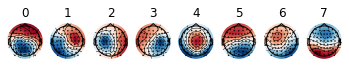

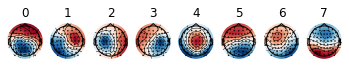

In [3]:
ModK.plot()